In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#1. Data Handling

In [2]:
# Load the Excel file
file_path = '/content/binary_classification_datasets.xlsx'
excel_file = pd.ExcelFile(file_path)
# List all the sheet names in the file
sheet_names = excel_file.sheet_names
print("Available Sheets:", sheet_names)

Available Sheets: ['Loan Approval', 'Medical Diagnosis', 'Student Performance']


##Loan Data

In [4]:
# Load a specific sheet into a DataFrame
loan_data = pd.read_excel(file_path, sheet_name='Loan Approval')
# Print the summary information of the DataFrame
print(loan_data.head())
print("\nSummary information of the DataFrame:")
print(loan_data.info())
print(loan_data.shape)

    Age    Income  Credit Score  Loan Amount  Employment Status  \
0  53.0       NaN         741.0      21572.0                1.0   
1  20.0   83010.0         542.0       9135.0                0.0   
2   NaN   27160.0         693.0      12963.0                1.0   
3  42.0       NaN         783.0          NaN                1.0   
4  61.0  147390.0         566.0      13207.0                0.0   

   Marital Status  Loan Approval  
0             1.0            1.0  
1             0.0            0.0  
2             NaN            0.0  
3             1.0            0.0  
4             1.0            1.0  

Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                458 non-null    float64
 1   Income             454 non-null    float64
 2   Credit Score       454 non-null    float64
 3  

In [6]:
missing_values = loan_data.isnull().sum()
missing_percentage = (missing_values / len(loan_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
                   Missing Values  Percentage
Age                            42         8.4
Income                         46         9.2
Credit Score                   46         9.2
Loan Amount                    41         8.2
Employment Status              45         9.0
Marital Status                 59        11.8
Loan Approval                  49         9.8


In [8]:
loan_data['Age'].fillna(loan_data['Age'].median(), inplace=True)
loan_data['Income'].fillna(loan_data['Income'].median(), inplace=True)
loan_data['Credit Score'].fillna(loan_data['Credit Score'].median(), inplace=True)
loan_data['Loan Amount'].fillna(loan_data['Loan Amount'].median(), inplace=True)
loan_data['Employment Status'].fillna(loan_data['Employment Status'].median(), inplace=True)
loan_data['Marital Status'].fillna(loan_data['Marital Status'].median(), inplace=True)
loan_data['Loan Approval'].fillna(loan_data['Loan Approval'].median(), inplace=True)
missing_values = loan_data.isnull().sum()
missing_percentage = (missing_values / len(loan_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
                   Missing Values  Percentage
Age                             0         0.0
Income                          0         0.0
Credit Score                    0         0.0
Loan Amount                     0         0.0
Employment Status               0         0.0
Marital Status                  0         0.0
Loan Approval                   0         0.0


In [14]:
from sklearn.impute import SimpleImputer
# Define imputer for numerical columns (mean strategy)
num_imputer = SimpleImputer(strategy='mean')
# Loan Approval dataset
loan_data[['Age', 'Income', 'Credit Score', 'Loan Amount']] = num_imputer.fit_transform(loan_data[['Age', 'Income', 'Credit Score', 'Loan Amount']])
# For categorical data, use the most frequent strategy
cat_imputer = SimpleImputer(strategy='most_frequent')
# Loan Approval: Handle categorical columns
loan_data[['Employment Status', 'Marital Status']] = cat_imputer.fit_transform(loan_data[['Employment Status', 'Marital Status']])
from sklearn.preprocessing import StandardScaler
# Scale numerical data
scaler = StandardScaler()
# Loan Approval: Scale the numerical features
loan_data[['Age', 'Income', 'Credit Score', 'Loan Amount']] = scaler.fit_transform(loan_data[['Age', 'Income', 'Credit Score', 'Loan Amount']])

##Medical data

In [10]:
# Load a specific sheet into a DataFrame
medical_data = pd.read_excel(file_path, sheet_name='Medical Diagnosis')
# Print the summary information of the DataFrame
print(medical_data.head())
print("\nSummary information of the DataFrame:")
print(medical_data.info())
print(medical_data.shape)

    Age  Blood Pressure  Cholesterol Level        BMI  Smoking  \
0  31.0            96.0              213.0  38.350882      1.0   
1  25.0           149.0              147.0  34.711467      0.0   
2  20.0           107.0              294.0  21.518329      0.0   
3  53.0           134.0              269.0  27.302961      0.0   
4  40.0           156.0              167.0  30.167945      0.0   

   Physical Activity  Disease  
0                0.0      1.0  
1                NaN      NaN  
2                0.0      NaN  
3                1.0      0.0  
4                1.0      0.0  

Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                453 non-null    float64
 1   Blood Pressure     454 non-null    float64
 2   Cholesterol Level  457 non-null    float64
 3   BMI                460 

In [12]:
print("Missing values before handling")
missing_values = medical_data.isnull().sum()
missing_percentage = (missing_values / len(medical_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))
medical_data['Age'].fillna(medical_data['Age'].median(), inplace=True)
medical_data['Blood Pressure'].fillna(medical_data['Blood Pressure'].median(), inplace=True)
medical_data['Cholesterol Level'].fillna(medical_data['Cholesterol Level'].median(), inplace=True)
medical_data['BMI'].fillna(medical_data['BMI'].median(), inplace=True)
medical_data['Smoking'].fillna(medical_data['Smoking'].median(), inplace=True)
medical_data['Physical Activity'].fillna(medical_data['Physical Activity'].median(), inplace=True)
medical_data['Disease'].fillna(medical_data['Disease'].median(), inplace=True)
print("Missing values after handling")
missing_values = medical_data.isnull().sum()
missing_percentage = (missing_values / len(medical_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

Missing values before handling

Columns with missing values and their percentage:
                   Missing Values  Percentage
Age                            47         9.4
Blood Pressure                 46         9.2
Cholesterol Level              43         8.6
BMI                            40         8.0
Smoking                        50        10.0
Physical Activity              51        10.2
Disease                        58        11.6
Missing values after handling

Columns with missing values and their percentage:
                   Missing Values  Percentage
Age                             0         0.0
Blood Pressure                  0         0.0
Cholesterol Level               0         0.0
BMI                             0         0.0
Smoking                         0         0.0
Physical Activity               0         0.0
Disease                         0         0.0


In [16]:
num_imputer = SimpleImputer(strategy='mean')
# Medical Diagnosis dataset
medical_data[['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']] = num_imputer.fit_transform(medical_data[['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']])
cat_imputer = SimpleImputer(strategy='most_frequent')
# Medical Diagnosis: Handle binary columns
medical_data[['Smoking', 'Physical Activity', 'Disease']] = cat_imputer.fit_transform(medical_data[['Smoking', 'Physical Activity', 'Disease']])
# Medical Diagnosis: Scale the numerical features
medical_data[['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']] = scaler.fit_transform(medical_data[['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']])

##student data

In [17]:
# Load a specific sheet into a DataFrame
student_data = pd.read_excel(file_path, sheet_name='Student Performance')
# Print the summary information of the DataFrame
print(student_data.head())
print("\nSummary information of the DataFrame:")
print(student_data.info())
print(student_data.shape)

   Study Hours  Attendance Rate  Previous Scores  Part-time Job  \
0          7.0        97.851616        51.920978            0.0   
1         11.0        67.121541        97.887073            1.0   
2          NaN        76.584414        65.287194            0.0   
3         32.0        97.959686        68.139464            1.0   
4          8.0        92.146084        98.884560            0.0   

   Parental Education  Extra Coaching  Passed  
0                 1.0             1.0     1.0  
1                 NaN             1.0     1.0  
2                 1.0             0.0     0.0  
3                 1.0             1.0     1.0  
4                 1.0             1.0     0.0  

Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         447 non-null    float64
 1   Attendance Rat

In [20]:
print("Missing values before handling")
missing_values = student_data.isnull().sum()
missing_percentage = (missing_values / len(student_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))
student_data['Parental Education'].fillna(student_data['Parental Education'].median(), inplace=True)
student_data['Extra Coaching'].fillna(student_data['Extra Coaching'].median(), inplace=True)
student_data['Passed'].fillna(student_data['Passed'].median(), inplace=True)
print("Missing values after handling")
missing_values = student_data.isnull().sum()
missing_percentage = (missing_values / len(student_data)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

Missing values before handling

Columns with missing values and their percentage:
                    Missing Values  Percentage
Study Hours                      0         0.0
Attendance Rate                  0         0.0
Previous Scores                  0         0.0
Part-time Job                    0         0.0
Parental Education               0         0.0
Extra Coaching                   0         0.0
Passed                           0         0.0
Missing values after handling

Columns with missing values and their percentage:
                    Missing Values  Percentage
Study Hours                      0         0.0
Attendance Rate                  0         0.0
Previous Scores                  0         0.0
Part-time Job                    0         0.0
Parental Education               0         0.0
Extra Coaching                   0         0.0
Passed                           0         0.0


In [21]:
# Student Performance dataset
student_data[['Study Hours', 'Attendance Rate', 'Previous Scores']] = num_imputer.fit_transform(student_data[['Study Hours', 'Attendance Rate', 'Previous Scores']])
# Student Performance: Handle binary columns
student_data[['Part-time Job', 'Parental Education', 'Extra Coaching', 'Passed']] = cat_imputer.fit_transform(student_data[['Part-time Job', 'Parental Education', 'Extra Coaching', 'Passed']])
# Student Performance: Scale the numerical features
student_data[['Study Hours', 'Attendance Rate', 'Previous Scores']] = scaler.fit_transform(student_data[['Study Hours', 'Attendance Rate', 'Previous Scores']])

#2. Data Visualization

##Loan data

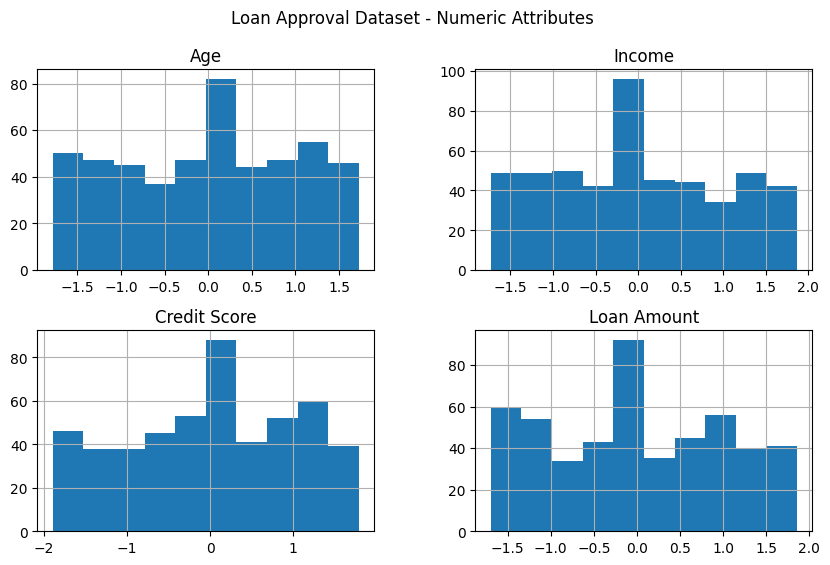

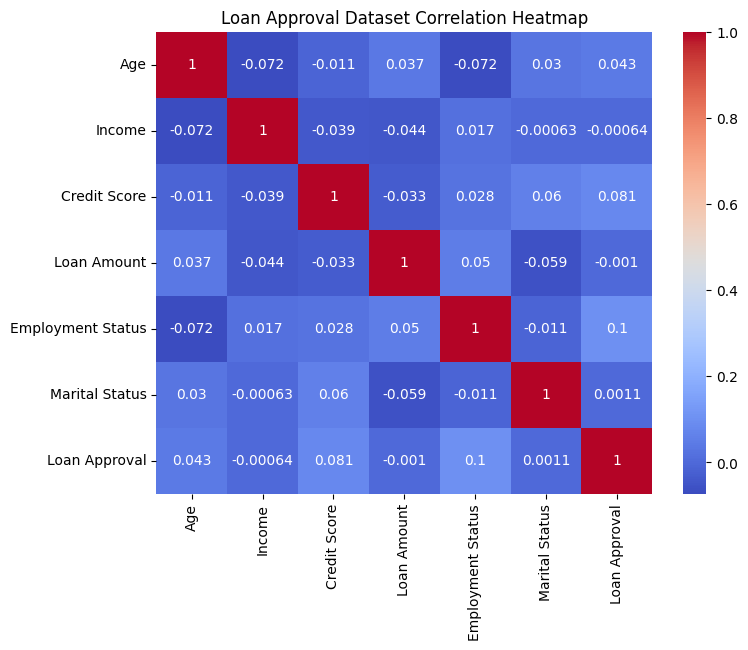

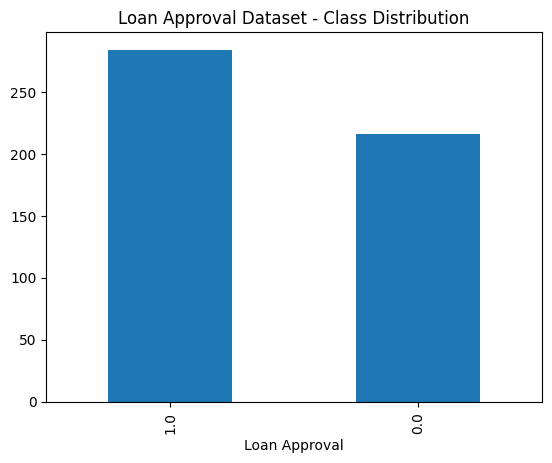

In [22]:
import matplotlib.pyplot as plt
# Function to plot histograms for numeric features
def plot_histograms(df, columns, title):
    df[columns].hist(figsize=(10, 6))
    plt.suptitle(title)
    plt.show()
# Loan Approval
plot_histograms(loan_data, ['Age', 'Income', 'Credit Score', 'Loan Amount'], 'Loan Approval Dataset - Numeric Attributes')

import seaborn as sns
# Function to plot a heatmap
def plot_correlation_heatmap(df, title):
    corr = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()
# Loan Approval
plot_correlation_heatmap(loan_data, 'Loan Approval Dataset Correlation Heatmap')

# Function to plot class distribution
def plot_class_distribution(df, target, title):
    df[target].value_counts().plot(kind='bar')
    plt.title(title)
    plt.show()
# Loan Approval
plot_class_distribution(loan_data, 'Loan Approval', 'Loan Approval Dataset - Class Distribution')

##Medical data

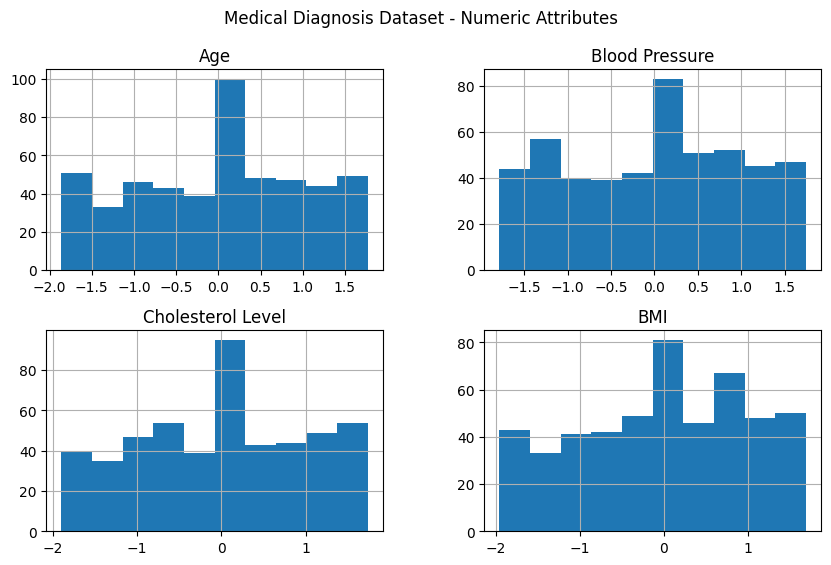

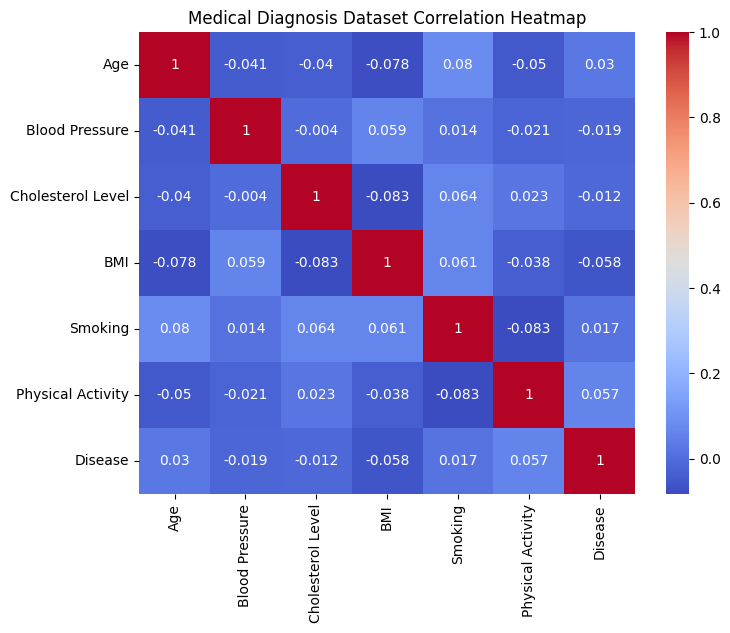

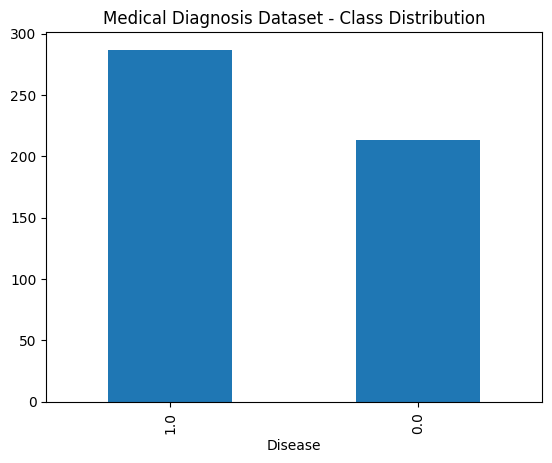

In [23]:
# Medical Diagnosis
plot_histograms(medical_data, ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI'], 'Medical Diagnosis Dataset - Numeric Attributes')
plot_correlation_heatmap(medical_data, 'Medical Diagnosis Dataset Correlation Heatmap')
plot_class_distribution(medical_data, 'Disease', 'Medical Diagnosis Dataset - Class Distribution')

##Student data

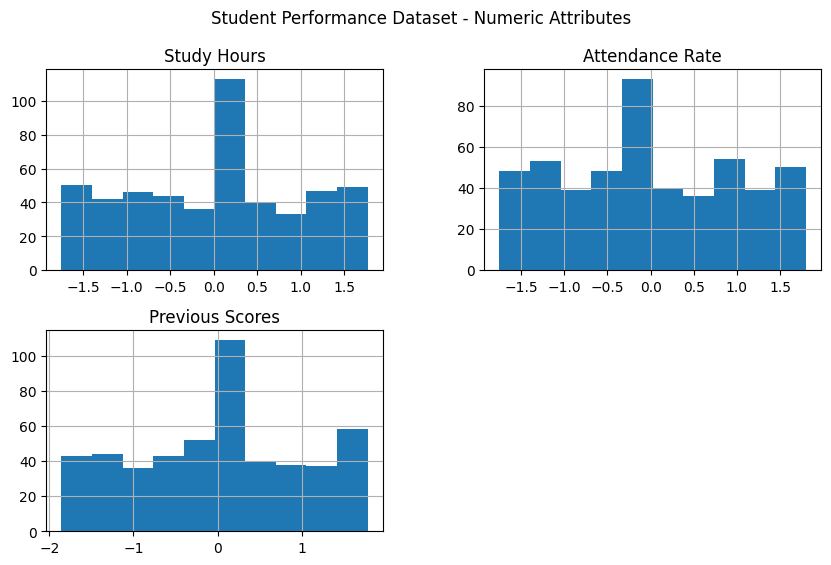

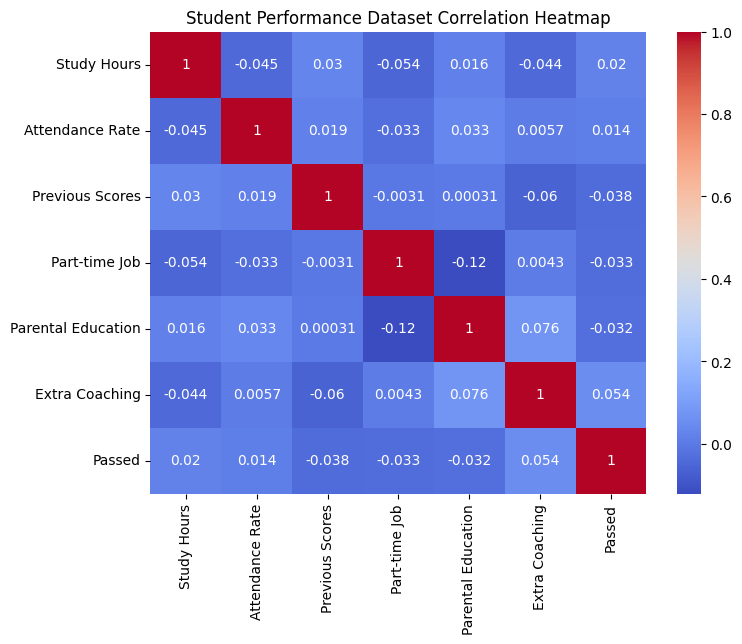

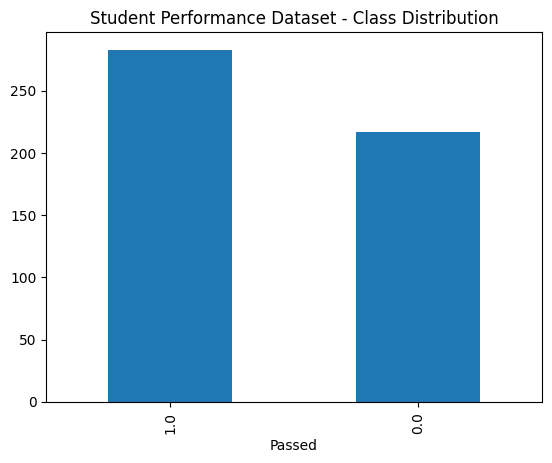

In [24]:
# Student Performance
plot_histograms(student_data, ['Study Hours', 'Attendance Rate', 'Previous Scores'], 'Student Performance Dataset - Numeric Attributes')
plot_correlation_heatmap(student_data, 'Student Performance Dataset Correlation Heatmap')
plot_class_distribution(student_data, 'Passed', 'Student Performance Dataset - Class Distribution')

#3. Logistic Regression Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Function to split data and train logistic regression model
def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test
# Remove rows where the target variable contains NaN
loan_data_cleaned = loan_data.dropna(subset=['Loan Approval'])
# Split data into features (X) and target (y)
X_loan = loan_data_cleaned.drop('Loan Approval', axis=1)
y_loan = loan_data_cleaned['Loan Approval']
# Continue with training
loan_model, X_loan_test, y_loan_test = train_logistic_regression(X_loan, y_loan)
# Medical Diagnosis dataset
X_medical = medical_data.drop('Disease', axis=1)
y_medical = medical_data['Disease']
medical_model, X_medical_test, y_medical_test = train_logistic_regression(X_medical, y_medical)
# Student Performance dataset
X_student = student_data.drop('Passed', axis=1)
y_student = student_data['Passed']
student_model, X_student_test, y_student_test = train_logistic_regression(X_student, y_student)

#4. Results comparision

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(" accuracy: ",(accuracy * 100),"\n","Precision: ",(precision*100),"\n","Recall: ",recall,"\n","F1: ",f1,"\n","ROC_AUC: ",roc_auc,"\n")
# Evaluate the Loan Approval model
print("Loan Evaluation")
loan_eval = evaluate_model(loan_model, X_loan_test, y_loan_test)
# Evaluate the Medical Diagnosis model
print("Medical Evaluation")
medical_eval = evaluate_model(medical_model, X_medical_test, y_medical_test)
# Evaluate the Student Performance model
print("Student Evaluation")
student_eval = evaluate_model(student_model, X_student_test, y_student_test)

Loan Evaluation
 accuracy:  62.0 
 Precision:  62.7906976744186 
 Recall:  0.9 
 F1:  0.7397260273972602 
 ROC_AUC:  0.5904166666666667 

Medical Evaluation
 accuracy:  56.00000000000001 
 Precision:  62.82051282051282 
 Recall:  0.765625 
 F1:  0.6901408450704225 
 ROC_AUC:  0.43359375000000006 

Student Evaluation
 accuracy:  55.00000000000001 
 Precision:  54.63917525773196 
 Recall:  0.9814814814814815 
 F1:  0.7019867549668873 
 ROC_AUC:  0.5281803542673107 



##Dataset with the Highest Predictive Performance:
The Loan Approval model had the highest predictive performance based on accuracy (62.0%) and a relatively high F1 score (0.7397). While recall was also high (0.9), indicating the model correctly identifies a large proportion of positive cases, the ROC AUC score (0.5904) suggests the model's ability to distinguish between classes is moderate.

##Feature Impact on Predictions:
Loan Approval: The high recall and precision suggest that the features in this dataset are likely well-suited for predicting loan approval outcomes. Key features such as income, credit score, and employment status might have a significant impact.

Medical Diagnosis: This model had the lowest ROC AUC (0.4336), indicating a struggle to differentiate between positive and negative cases. This could be due to overlapping or less informative features, such as patient symptoms that may not clearly separate different diagnoses.

Student Performance: Despite a high recall (0.9815), the model's lower precision (54.64%) and accuracy (55%) indicate that the features used may lead to many false positives. Features like study time, parental education, and school performance might contribute unevenly to the model's predictions.